In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:

data_small = pd.read_csv('dataset small.csv')

data_small['GENDER'] = data_small['GENDER'].map({'M': 0, 'F': 1})

data_small['LUNG_CANCER'] = data_small['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
                  'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY',
                  'CHEST_PAIN']


for column in binary_columns:
    data_small[column] = data_small[column].map({1: 0, 2: 1})

In [ ]:
X = data_small.drop('LUNG_CANCER', axis=1)
y = data_small['LUNG_CANCER']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


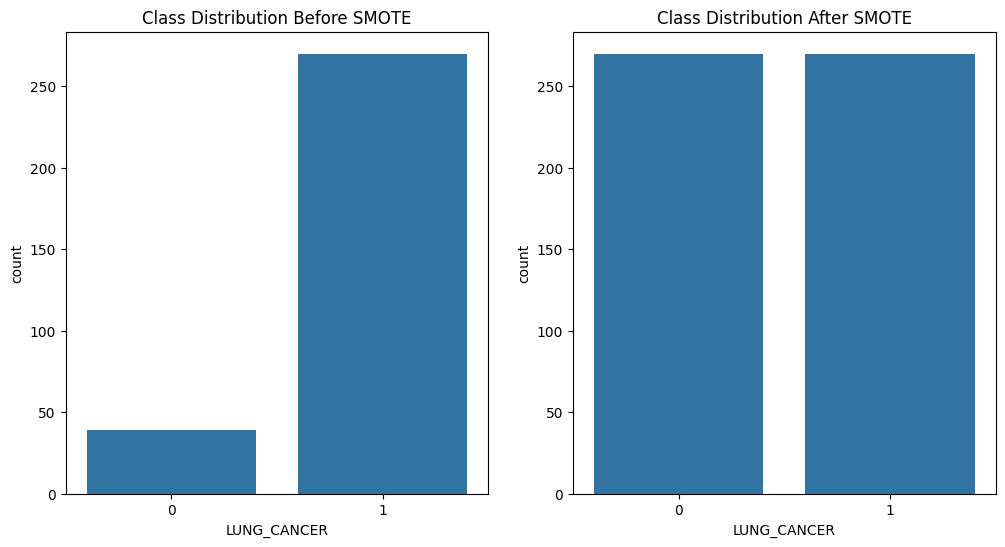

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before SMOTE
sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(max_iter=165),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model_results = []

In [ ]:
for model_name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Collect and display results
    mean_cv_accuracy = cv_results.mean()
    std_cv_accuracy = cv_results.std()
    test_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results.append({
        'Model': model_name,
        'Mean CV Accuracy': f"{mean_cv_accuracy:.4f}",
        'Std CV Accuracy': f"{std_cv_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'F1 Score': f"{f1:.4f}"
    })

In [ ]:
results_df = pd.DataFrame(model_results)
print(results_df)

                 Model Mean CV Accuracy Std CV Accuracy Test Accuracy F1 Score
0  Logistic Regression           0.9655          0.0328        0.9537   0.9573
1        Decision Tree           0.9216          0.0491        0.9444   0.9483
2        Random Forest           0.9585          0.0266        0.9537   0.9573
